# Quantitative People Analytics

#### By Thomas Bierly

## Business Problem
Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition.

In this context, the use of classification models to predict if an employee is likely to quit could greatly increase the HR’s ability to intervene on time and remedy the situation to prevent attrition. While this model can be routinely run to identify employees who are most likely to quit, the key driver of success would be the human element of reaching out the employee, understanding the current situation of the employee and taking action to remedy controllable factors that can prevent attrition of the employee.

This data set presents an employee survey from IBM, indicating if there is attrition or not. The data set contains approximately 1500 entries. Given the limited size of the data set, the model should only be expected to provide modest improvement in indentification of attrition vs a random allocation of probability of attrition.

While some level of attrition in a company is inevitable, minimizing it and being prepared for the cases that cannot be helped will significantly help improve the operations of most businesses. As a future development, with a sufficiently large data set, it would be used to run a segmentation on employees, to develop certain “at risk” categories of employees. This could generate new insights for the business on what drives attrition, insights that cannot be generated by merely informational interviews with employees.

## Data Descriptions
#### IBM HR Analytics Employee Attrition & Performance
Rohan’s Four - Rohan Jain, Ali Shahid, Sehrish Saud, Julian Ramirez
#### 'data.frame':    1470 obs. of  35 variables:
|Name|Description|
|:-|:-|
|AGE|Numerical Value|
|ATTRITION|Employee leaving the company (0=NO, 1=YES)|
|BUSINESS TRAVEL|(0=NO TRAVEL, 1=TRAVEL RARELY, 2=TRAVEL FREQUENTLY)|
|DAILY RATE|Numerical Value - Salary Level|
|DEPARTMENT|(1=HR, 2=R&D, 3=SALES)|
|DISTANCE FROM HOME|Numerical Value - THE DISTANCE FROM WORK TO HOME|
|EDUCATION|Numerical Value|
|EDUCATION FIELD|(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL, 5=OTHER, 6= TECHNICAL)|
|EMPLOYEE COUNT|Numerical Value|
|EMPLOYEE NUMBER|Numerical Value - EMPLOYEE ID|
|ENVIROMENT SATISFACTION|Numerical Value - SATISFACTION WITH THE ENVIROMENT|
|GENDER|(0=FEMALE, 1=MALE)|
|HOURLY RATE|Numerical Value - HOURLY SALARY|
|JOB INVOLVEMENT|Numerical Value - JOB INVOLVEMENT|
|JOB LEVEL|Numerical Value - LEVEL OF JOB|
|JOB ROLE|(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANUFACTORING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)|
|JOB SATISFACTION|Numerical Value - SATISFACTION WITH THE JOB|
|MARITAL STATUS|(2=MARRIED, 1=SINGLE, 0=DIVORCED)|
|MONTHLY INCOME|Numerical Value - MONTHLY SALARY|
|MONTHY RATE|Numerical Value - MONTHY RATE|
|NUMCOMPANIES WORKED|Numerical Value - NO. OF COMPANIES WORKED AT|
|OVER 18|(1=YES, 0=NO)|
|OVERTIME|(0=NO, 1=YES)|
|PERCENT SALARY HIKE|Numerical Value - PERCENTAGE INCREASE IN SALARY|
|PERFORMANCE RATING|Numerical Value - PERFORMANCE RATING|
|RELATIONS SATISFACTION|Numerical Value - RELATIONS SATISFACTION|
|STANDARD HOURS|Numerical Value - STANDARD HOURS|
|STOCK OPTIONS LEVEL|Numerical Value - STOCK OPTIONS|
|TOTAL WORKING YEARS|Numerical Value - TOTAL YEARS WORKED|
|TRAINING TIMES LAST YEAR|Numerical Value - HOURS SPENT TRAINING||
|YEARS AT COMPANY|Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY|
|YEARS IN CURRENT ROLE|Numerical Value -YEARS IN CURRENT ROLE|
|YEARS SINCE LAST PROMOTION|Numerical Value - LAST PROMOTION|
|YEARS WITH CURRENT MANAGER|Numerical Value - YEARS SPENT WITH CURRENT MANAGER|



## Import Python Libraries

In [1]:
# import python libraries
import pandas as pd # data tables
import numpy as np # matrix/array math

# statistical methods
import statsmodels.api as sm # R style statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor # detect multicolinearity
from statsmodels.formula.api import ols # regressions
#from scipy import stats
import scipy.stats as stats
from scipy.stats import chi2_contingency # chi square
import pingouin as pg

# machine learning methods
from sklearn.model_selection import train_test_split # split data into training and testing groups to build machine learning models
from sklearn.metrics import classification_report # used to evaluate the machine learning models
from sklearn.ensemble import RandomForestClassifier # random forest machine learning model

# deep learning methods
from sklearn import preprocessing # standardise/scale data for neural network
from sklearn.neural_network import MLPClassifier # multilayer perceptron neural network

# plot charts to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# display pretty pictures
from IPython.display import Image

## Import and Clean the Data

In [2]:
# import the IBM HR Attrition Dataset
df = pd.read_csv('IBM_HR_Employee_Attrition.csv')

In [3]:
# clean the data
df.drop('Over18', 1, inplace=True) # we get their age from another variable
df.drop('EmployeeNumber', 1, inplace=True) # unique identification numbers don't help us classify
df.drop('EmployeeCount', 1, inplace=True) # there is only one value so it doesn't help us classify
df.drop('StandardHours', 1, inplace=True) # there is only one value so it doesn't help us classify

df.Attrition.replace(('Yes', 'No'), (1, 0), inplace=True) # dependent variable binary
df.BusinessTravel.replace(('Travel_Frequently', 'Travel_Rarely', 'Non-Travel'), (2, 1, 0), inplace=True) # re-ordering so the values make more sense
df.Department.replace(('Human Resources', 'Research & Development', 'Sales'), (1,2,3), inplace=True)
df.EducationField.replace(('Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree'), (1, 2, 3, 4, 5, 6), inplace=True)
df.Gender.replace(('Male', 'Female'), (1, 0), inplace=True) # dataset uses gender binary
df.JobRole.replace(('Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative'), (1,2,3,4,5,6,7,8,9), inplace=True)
df.MaritalStatus.replace(('Single', 'Married', 'Divorced'), (1, 2, 3), inplace=True)
df.OverTime.replace(('Yes', 'No'), (1, 0), inplace=True) # binary




## Chi Square & Pearson's R

Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


p value is: 8.15842372153832e-21
Dependent (reject H0)
Pearson's R is: 0.24611799424580422


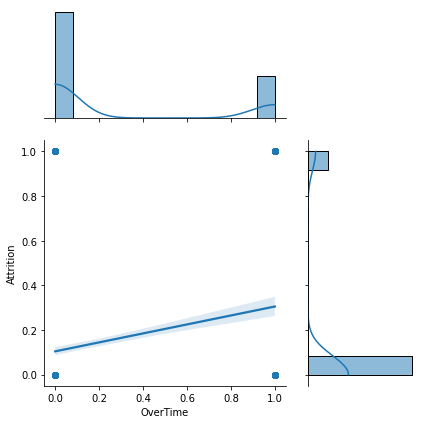

In [4]:
# select y and x values.
y = df['Attrition']
x = df['OverTime']

# compute a chi square test
stat, p, dof, expected = chi2_contingency(pd.crosstab(y,x))
# interpret p-value
alpha = 0.05
print("p value is: " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')

    # compute Pearson's Correlation    
    print('Pearson\'s R is: ' + str(y.corr(x)))

    # plot the relationship
    sns.jointplot(x=x, y=y, kind='reg', ratio=2)

else:
    print('Independent (H0 holds true)')



## Multivariate Analysis

In [5]:
# establish the the independent variables set
X = df.copy()
X = X.drop('Attrition', 1) # drop the dependent variable

# dropping the fixed effects (categories)
X = X.drop('Department', 1)
#X = X.drop('EducationField', 1)
X = X.drop('JobRole', 1)
#X = X.drop('BusinessTravel', 1)
#X = X.drop('MaritalStatus', 1)
#X = X.drop('Gender', 1)
#X = X.drop('OverTime', 1)

[Text(0.5, 1.0, 'Correlation Matrix')]

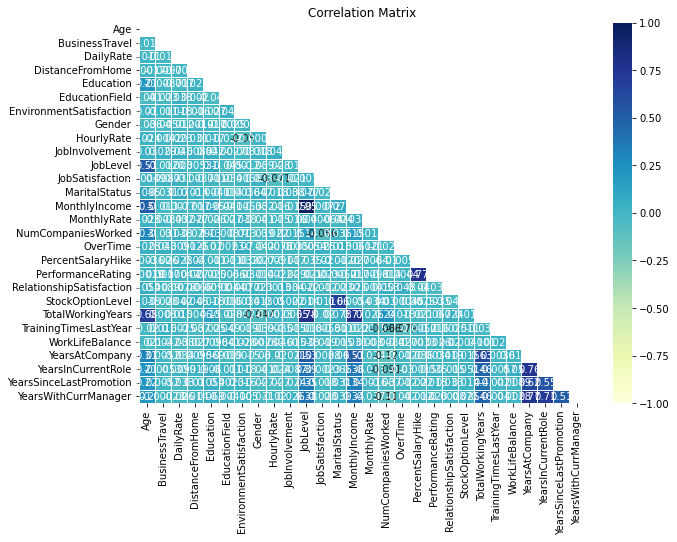

In [6]:
# plot a correlation matrix
plt.figure(figsize=(10,7))

# generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df[X.columns].corr(), dtype=bool))

sns.heatmap(df[X.columns].corr(), annot=True, mask=mask, vmin=-1, vmax=1, cmap="YlGnBu", linewidth=0.5).set(title='Correlation Matrix')

In [7]:
# multicollinearity problems
X = X.drop('Age', 1)
#X = X.drop('NumCompaniesWorked', 1) # collinear with Age
X = X.drop('TotalWorkingYears', 1) # Age, Total Working Years, Years Since Last Promotion, Years With Current Manager, Years at Company, Years in Current Role, and Job Level are collinear
X = X.drop('YearsSinceLastPromotion', 1)
X = X.drop('YearsWithCurrManager', 1)
X = X.drop('YearsAtCompany', 1)
X = X.drop('JobLevel', 1)
X = X.drop('JobInvolvement', 1) # collinear with Work Life Balance
X = X.drop('MaritalStatus', 1) # collinear with Work Life Balance

# no significant relations
X = X.drop('Education', 1)
X = X.drop('Gender', 1)
X = X.drop('PerformanceRating', 1) # Performance Rating and Salary Hike are collinear
X = X.drop('PercentSalaryHike', 1)
X = X.drop('HourlyRate', 1) # Hourly Rate, Daily Rate, Monthly Rate, and Monthly Income are collinear
X = X.drop('DailyRate', 1)
X = X.drop('MonthlyRate', 1)
X = X.drop('MonthlyIncome', 1)


In [8]:
# VIF dataframe: 1 = little collinearity, 3 = moderate collinearity, 10+ = high collinearity 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,BusinessTravel,4.775186
1,DistanceFromHome,2.226784
2,EducationField,6.346328
3,EnvironmentSatisfaction,6.561561
4,JobSatisfaction,6.180139
5,NumCompaniesWorked,2.128847
6,OverTime,1.415416
7,RelationshipSatisfaction,6.587411
8,StockOptionLevel,1.858423
9,TrainingTimesLastYear,5.319208


<AxesSubplot:>

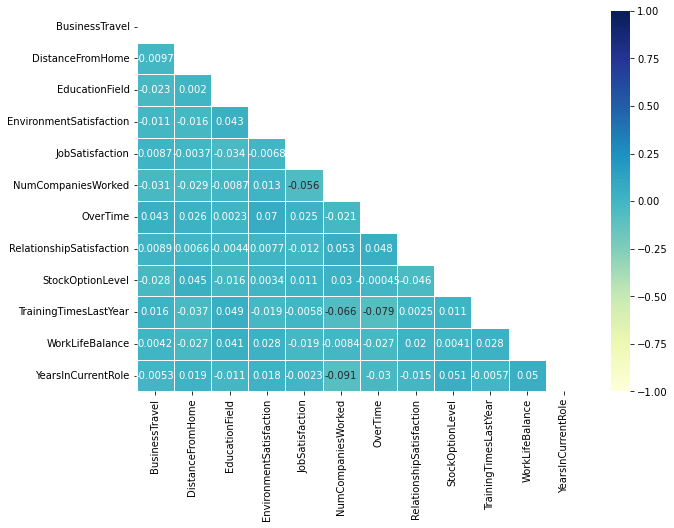

In [9]:
# plot a correlation matrix
plt.figure(figsize=(10,7))

# generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df[X.columns].corr(), dtype=bool))

sns.heatmap(df[X.columns].corr(), annot=True, mask=mask, vmin=-1, vmax=1, cmap="YlGnBu", linewidth=0.5)

# Ordinary least Squares Formula

In [10]:
# write OLS formula
dependent_var = 'Attrition'
df_columns = list(X.columns.values)
fml = dependent_var + ' ~ ' + ' + '.join(df_columns)
print(fml)

Attrition ~ BusinessTravel + DistanceFromHome + EducationField + EnvironmentSatisfaction + JobSatisfaction + NumCompaniesWorked + OverTime + RelationshipSatisfaction + StockOptionLevel + TrainingTimesLastYear + WorkLifeBalance + YearsInCurrentRole


In [11]:
# add fixed effects
fml = fml + ' + C(Department) + C(JobRole)' # + C(EducationField) + C(BusinessTravel) + C(OverTime) + C(Gender) + C(MaritalStatus)
print(fml)

Attrition ~ BusinessTravel + DistanceFromHome + EducationField + EnvironmentSatisfaction + JobSatisfaction + NumCompaniesWorked + OverTime + RelationshipSatisfaction + StockOptionLevel + TrainingTimesLastYear + WorkLifeBalance + YearsInCurrentRole + C(Department) + C(JobRole)


# ANOVA

In [12]:
# ANOVA
mod = sm.OLS.from_formula(fml, data=df).fit() #cov_type='cluster', cov_kwds={'groups': df['Department']}
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                              sum_sq      df           F        PR(>F)
C(Department)               0.031562     2.0    0.143951  8.659422e-01
C(JobRole)                  7.413120     8.0    8.452606  2.761792e-11
BusinessTravel              2.255233     1.0   20.571738  6.218219e-06
DistanceFromHome            1.156248     1.0   10.547037  1.190419e-03
EducationField              0.186528     1.0    1.701471  1.923032e-01
EnvironmentSatisfaction     2.620597     1.0   23.904510  1.125225e-06
JobSatisfaction             2.176933     1.0   19.857506  8.986105e-06
NumCompaniesWorked          1.010276     1.0    9.215519  2.442566e-03
OverTime                   12.243354     1.0  111.681182  3.382988e-25
RelationshipSatisfaction    0.861133     1.0    7.855063  5.135444e-03
StockOptionLevel            3.250198     1.0   29.647588  6.079724e-08
TrainingTimesLastYear       0.444755     1.0    4.056959  4.417441e-02
WorkLifeBalance             0.558654     1.0    5.095915  2.413081e-02
YearsI

# Multiple Regression

In [13]:
# multiple regression
olsModel = sm.OLS.from_formula(fml, data=df)
results = olsModel.fit(cov_type='cluster', cov_kwds={'groups': df['JobRole']}) # cov_type='cluster', cov_kwds={'groups': df['JobRole']} # cov_type='HC1'
results.summary()                

C:\Users\Thomas\anaconda3\lib\site-packages\statsmodels\base\model.py:1863: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 22, but rank is 8
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     74.02
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.07e-06
Time:                        14:23:57   Log-Likelihood:                -449.41
No. Observations:                1470   AIC:                             944.8
Df Residuals:                    1447   BIC:                             1067.
Df Model:                          22                                         
Covariance Type:              cluster                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.2423      0.110      2.213      0.027       0.028       0.457
C(Department)[T.2]           0.0590      0.006      9.252      0.000       0.046       0.071
C(Department)[T.3]           0.0456      0.007      6.260      0.000       0.031       0.060
C(JobRole)[T.2]              0.2139      0.012     18.503      0.000       0.191       0.237
C(JobRole)[T.3]              0.1677      0.009     18.280      0.000       0.150       0.186
C(JobRole)[T.4]              0.0184      0.009      2.163      0.031       0.002       0.035
C(JobRole)[T.5]              0.0089      0.003      3.545      0.000       0.004       0.014
C(JobRole)[T.6]             -0.0435      0.008     -5.692      0.000      -0.058      -0.029
C(JobRole)[T.7]              0.0686      0.011      6.100      0.000       0.047       0.091
C(JobRole)[T.8]              0.1229      0.009     13.898      0.000       0.106       0.140
C(JobRole)[T.9]              0.3172      0.028     11.345      0.000       0.262       0.372
BusinessTravel               0.0740      0.019      3.969      0.000       0.037       0.111
DistanceFromHome             0.0035      0.001      2.436      0.015       0.001       0.006
EducationField               0.0086      0.004      2.077      0.038       0.000       0.017
EnvironmentSatisfaction     -0.0390      0.008     -5.164      0.000      -0.054      -0.024
JobSatisfaction             -0.0350      0.008     -4.328      0.000      -0.051      -0.019
NumCompaniesWorked           0.0108      0.005      2.084      0.037       0.001       0.021
OverTime                     0.2050      0.041      5.019      0.000       0.125       0.285
RelationshipSatisfaction    -0.0225      0.010     -2.323      0.020      -0.042      -0.004
StockOptionLevel            -0.0555      0.011     -4.923      0.000      -0.078      -0.033
TrainingTimesLastYear       -0.0137      0.006     -2.185      0.029      -0.026      -0.001
WorkLifeBalance             -0.0279      0.024     -1.142      0.253      -0.076       0.020
YearsInCurrentRole          -0.0082      0.005     -1.671      0.095      -0.018       0.001
==============================================================================
Omnibus:                      303.229   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.903
Skew:                           1.351   Prob(JB):                    9.40e-113
Kurtosis:                       4.057   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


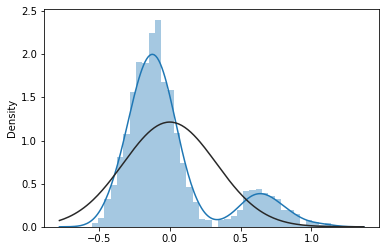

In [14]:
sns.distplot(results.resid, fit=stats.norm);

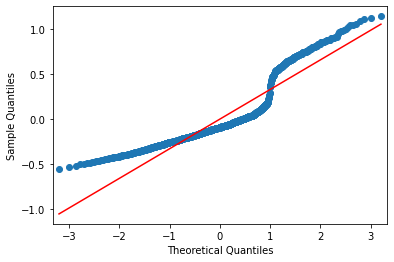

In [15]:
sm.qqplot(results.resid, line='s');

# Random Forest Machine Learning
![Random Forest](randomforest.png "Random Forest")


In [16]:
# clean the data so only numerical variables are in the dataset
#ndf = df.select_dtypes(include=[np.number]).copy()
y = df['Attrition'].copy()
X = df.copy()
X.drop('Attrition', 1, inplace=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,stratify=y)

In [17]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

print('Results on the test set:')
print(classification_report(y_test, Y_prediction))

Results on the test set:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       432
           1       0.88      0.17      0.28        83

    accuracy                           0.86       515
   macro avg       0.87      0.58      0.60       515
weighted avg       0.86      0.86      0.82       515



C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,8.6
Age,6.3
OverTime,6.0
TotalWorkingYears,5.9
DailyRate,5.2
MonthlyRate,4.6
YearsAtCompany,4.3
HourlyRate,4.2
DistanceFromHome,3.8


<AxesSubplot:xlabel='feature'>

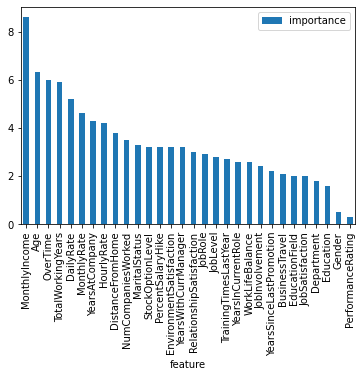

In [19]:
importances.plot.bar()

### Split by Men and Women

In [20]:
# split the data based on gender
m = df[df['Gender'] == 1].copy()
w = df[df['Gender'] == 0].copy()

#### Men

                          importance
feature                             
MonthlyIncome                    7.5
OverTime                         7.3
DistanceFromHome                 5.9
MonthlyRate                      5.4
DailyRate                        5.3
TotalWorkingYears                5.2
NumCompaniesWorked               4.9
Age                              4.8
HourlyRate                       4.5
PercentSalaryHike                4.3
YearsWithCurrManager             3.9
YearsAtCompany                   3.7
StockOptionLevel                 3.2
JobSatisfaction                  3.1
YearsInCurrentRole               2.9
JobRole                          2.7
JobLevel                         2.7
JobInvolvement                   2.7
EnvironmentSatisfaction          2.5
BusinessTravel                   2.3
MaritalStatus                    2.2
Education                        2.1
WorkLifeBalance                  2.1
RelationshipSatisfaction         2.0
EducationField                   1.8
Y

C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='feature'>

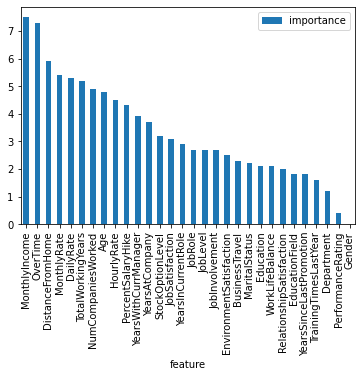

In [21]:
# men
y = m['Attrition'].copy()
X = m.copy()
X.drop('Attrition', 1, inplace=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,stratify=y)

# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)
importances.plot.bar()

#### Women

                          importance
feature                             
Age                              9.9
MonthlyIncome                    8.9
TotalWorkingYears                8.0
DailyRate                        6.8
YearsAtCompany                   5.9
DistanceFromHome                 4.1
OverTime                         4.0
HourlyRate                       3.9
WorkLifeBalance                  3.6
JobLevel                         3.3
MonthlyRate                      3.2
TrainingTimesLastYear            3.1
JobRole                          3.1
RelationshipSatisfaction         3.1
PercentSalaryHike                3.0
BusinessTravel                   2.5
YearsSinceLastPromotion          2.4
StockOptionLevel                 2.4
YearsInCurrentRole               2.3
YearsWithCurrManager             2.1
NumCompaniesWorked               2.1
EnvironmentSatisfaction          1.9
Education                        1.9
JobInvolvement                   1.9
Department                       1.7
M

C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='feature'>

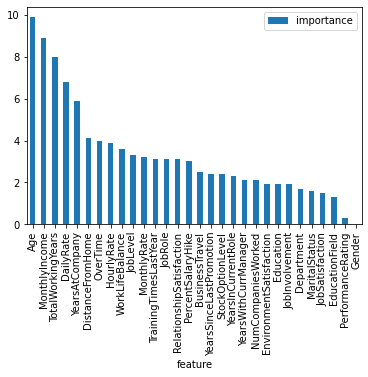

In [22]:
# women
y = w['Attrition'].copy()
X = w.copy()
X.drop('Attrition', 1, inplace=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,stratify=y)

# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)
importances.plot.bar()

# Multi-Layer Perceptron Classifier

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [24]:
# initializing the MLPClassifier
mlp = MLPClassifier(max_iter=300, hidden_layer_sizes=(493,493,316), alpha=0.05, activation='relu', learning_rate='adaptive', solver='adam', random_state=0) #max_iter=2000, hidden_layer_sizes=(493,493,316), alpha=0.05, activation='relu', learning_rate='adaptive', solver='sgd', random_state=0

mlp.fit(X_train_minmax, y_train)

# predict results
y_pred = mlp.predict(X_test_minmax)

print('Results on the test set:')
print(classification_report(y_test, y_pred))


Results on the test set:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       176
           1       0.54      0.43      0.48        30

    accuracy                           0.86       206
   macro avg       0.72      0.69      0.70       206
weighted avg       0.85      0.86      0.86       206



EMPLOYED


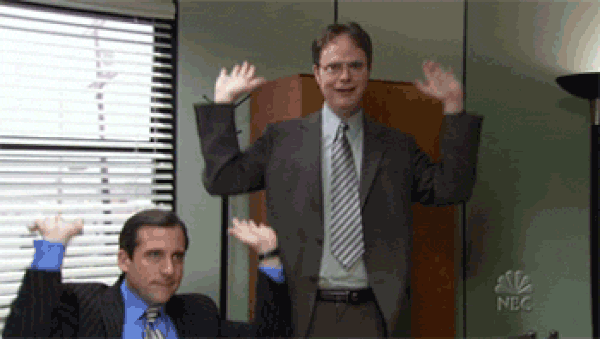

In [25]:
# select the passenger record
employee = 7

singleX = X_test_minmax[[employee]]

# Make the Prediction
sY_pred = mlp.predict(singleX)

if sY_pred == 1:
    pic = 'quit'
    status = 'QUIT'
else:
    pic = 'employed'
    status = 'EMPLOYED'
    
print('\033[1m' + status + '\033[0m')
Image(filename=pic+'.gif')